# **데이터 전처리**

> 수집한 데이터를 바로 분석하는 일은 흔하지 않다.  
양질의 데이터를 수집하였다면, 이를 훈련할 모델에 맞게 변형, 중복값 제거, 구조 변환 등의 처리가 필요하다.

In [1]:
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### ***column_stack()***
* 전달받은 리스트를 차례대로 나란히 연결해준다.  
* 연결할 리스트는 파이썬 튜플로 전달한다.  
* 행과 열을 맞추어 나란히 정리하여 출력된다.

In [2]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

> 입력 데이터 만들기

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

### **타겟 데이터 만들기**
> 도미는 1 빙어는 0으로 타겟 값을 설정한다.  
* ones() : 원하는 개수의 1을 채운 배열을 만들어준다.  
* zeros() : 원하는 개수의 0을 채운 배열을 만들어준다.

In [7]:
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


### **concatenate()**
* 전달한 두 배열을 그대로 연결해준다.  

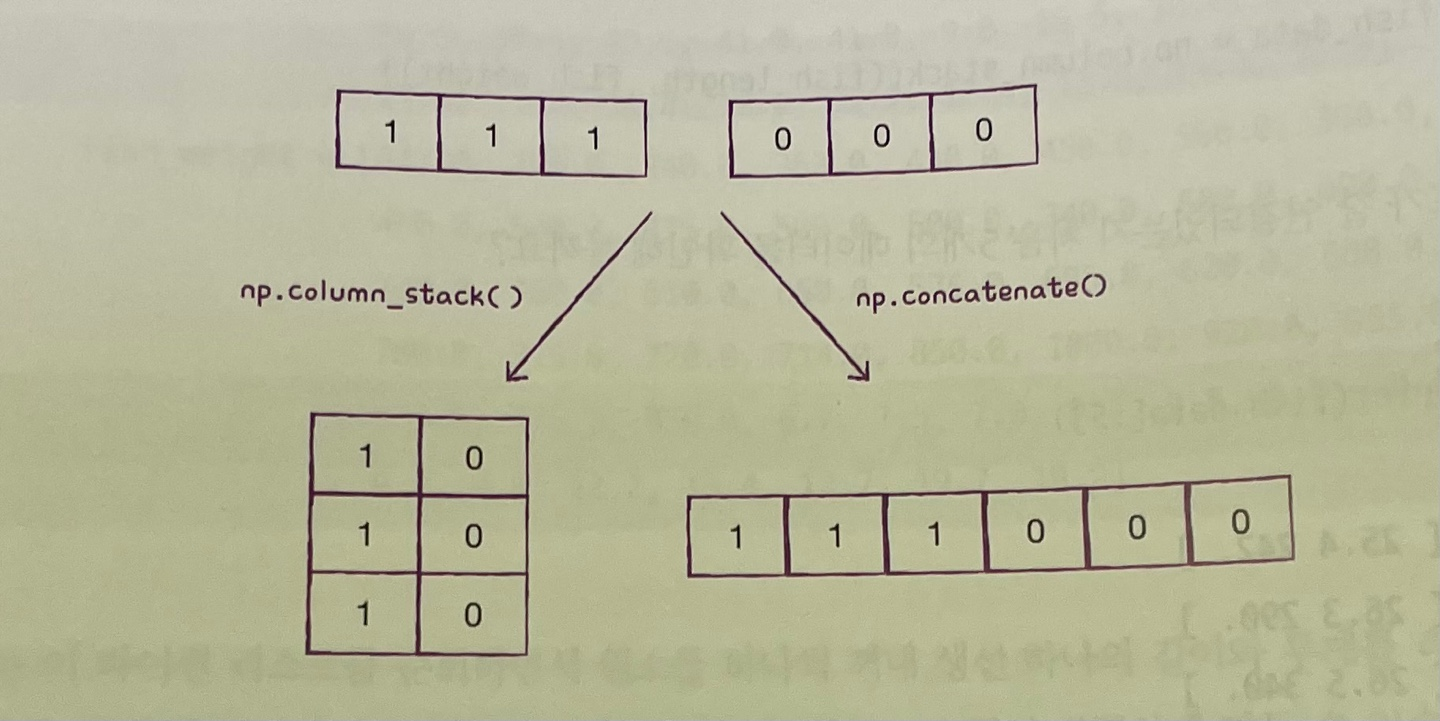

In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### **훈련세트와 테스트세트 나누기**
***train_test_split()***  
> 넘파이 배열의 인덱스를 직접 섞어서 세트를 나누면 번거로운 부분이 있다.  
사이킷런에서 다양한 유틸리티 도구도 제공하는데, model_selection 모듈 아래에 있는 함수이며,  
알아서 훈련 세트와 테스트 세트를 섞어준다. 
이 때 기본적으로 테스트 세트는 25%를 떼어낸다.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
##fish_data와 fish_target 두 개의 배열을 전달했으므로 2개씩 나뉘어 총 4개의 배열이 된다.
#랜덤 시드 값을 정할 수 있으며, 42로 정한다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

> 훈련데이터와 테스트데이터를 각각 36개와 13개로 나눈다.

In [11]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


> 도미와 빙어가 잘 섞여 있는 지 확인한다.

In [12]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### **샘플링 편향**
> 13개의 테스트 세트 중에서 10개가 도미이고, 3개가 빙어이다.  
이는 **3.3:1**의 비율이며, 도미와 빙어의 입력 데이터 개수가 각각 35개, 14개이고, 이는 **2.5:1**의 비율이다.  
이와 같이 입력 데이터 개수가 적고 무작위로 나누었을 때 샘플링 편향이 나타날 수 있다.  

***train_test_split() - stratify***
* stratify 매개변수에 타겟 데이터를 전달하면 클래스의 비율에 최대한 맞게 데이터를 나눠주게 된다.  
* 특정 클래스의 샘플 개수가 적을 때 유용하게 사용된다.

In [15]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

> 도미 9개와 빙어 4개이며, **2.25:1**의 비율로, 동일하지는 않지만 비슷하게 맞춰졌다.

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### **k-최근접 이웃 훈련**
* 훈련 데이터를 저장하는 것이 KNN훈련의 전부이다.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
#훈련 세트를 훈련 시켜 테스트 세트의 정확도를 출력한다.
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

* 길이 25, 무게 150 도미가 어떤 생선으로 예측되는 지 알아보자.

In [18]:
#결과는 빙어로 나온다?!
kn.predict([[25, 150]])

array([0.])

* 산점도 출력

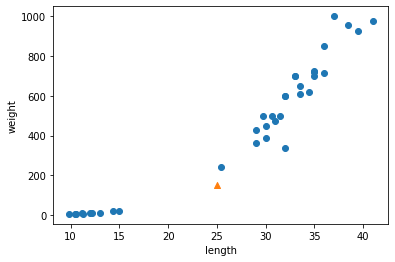

In [20]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^') #marker는 모양을 지정한다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#분명 오른쪽 위의 점들(도미)이 문제의 도미에 더 가깝다.
#왼쪽 아래에 낮게 깔린 점들(빙어)에 더 가깝다는 것일까?

* 산점도 모양 종류  
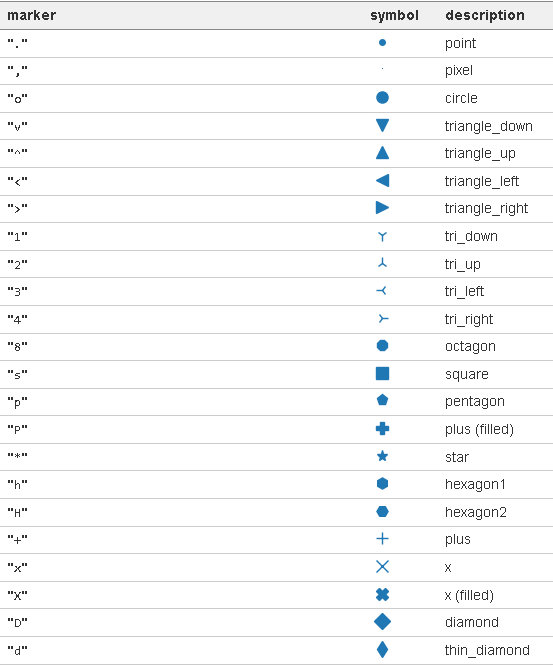

* **kneighbors()**
> 이웃까지의 거리와 이웃 샘플의 인덱스를 가져온다.  
KNeighborsClassfier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃을 가져오게 된다.

In [26]:
distances, indexes = kn.kneighbors([[25, 150]])
print(indexes)

[[21 33 19 30  1]]


* 이웃샘플의 인덱스를 산점도에 표현

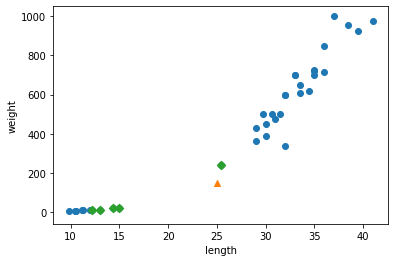

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [25]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') #Diamond : 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(distances) #그래프 상으로 거리의 비율이 이상하다. '92'의 몇 배의 길이를 '130'이라 표현하고 있다.

* **스케일**
> 각 특성 간 값의 범위가 다르기 때문에 스케일이 다른 일은 매우 흔하다.  
거리 기반인 알고리즘을 사용할 때에는 스케일이 다르게 되면 올바르게 예측할 수 없기 때문에 직접 특성 값을 일정한 기준으로 맞춰 주어야 한다.

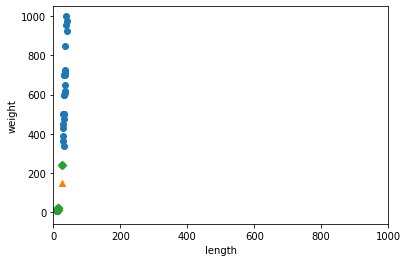

In [27]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D') #Diamond : 마름모
plt.xlim((0, 1000)) #y축과 동일하게 x축도 0~1000으로 맞추어 준다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#수직으로 늘어선 형태가 나온다.
#생선의 길이(x축)는 큰 영향을 미치지 못하고, 생선의 무게(y축)만 고려 대상이 된다.